In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import nltk
import re

In [3]:
# Specify the filename
input_file = 'holmes.txt'

# Read the contents of the file
with open(input_file, 'r', encoding='utf-8') as infile:
    data = infile.read()

In [4]:
data[:200] # view first few characters

"*Project Gutenberg's Etext of Tom Swift And His Submarine Boat*\n\n#4 in the Victor Appleton's Tom Swift Series\n\nWe name these Etext files as they are numbered in the books,\n\ni.e. This is #4 in the seri"

In [5]:
# Limit data to 500000 characters
data = data[:500000]

In [6]:
# Function to remove emojis and special characters from text
def remove_emojis_and_special_characters(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    
    return text

In [7]:
# Preprocessing pipeline
def preprocess_pipeline(data):
    # Split by newline character
    sentences = data.split('\n')
    for i in range(len(sentences)):
        sentences[i] = remove_emojis_and_special_characters(sentences[i])
    # Remove leading and trailing spaces
    sentences = [s.strip() for s in sentences]
    # Drop empty sentences
    sentences = [s for s in sentences if len(s) > 0]
    # Tokenization
    tokenized = []
    for sentence in sentences:
        # Convert to lowercase
        sentence = sentence.lower()
        tokenized.append(sentence)
    return tokenized

# Tokenize sentences
tokenized_sentences = preprocess_pipeline(data)

In [8]:
tokenized_sentences

['project gutenbergs etext of tom swift and his submarine boat',
 '4 in the victor appletons tom swift series',
 'we name these etext files as they are numbered in the books',
 'ie this is 4 in the series so the file name is 04tomxxxxxx',
 'where the xs are place holders for editon and file type such',
 'as 04tom10txt and 04tom10zip when we do a htm 04tom10hhtm',
 'copyright laws are changing all over the world be sure to check',
 'the copyright laws for your country before posting these files',
 'please take a look at the important information in this header',
 'we encourage you to keep this file on your own disk keeping an',
 'electronic path open for the next readers do not remove this',
 'welcome to the world of free plain vanilla electronic texts',
 'etexts readable by both humans and by computers since 1971',
 'these etexts prepared by hundreds of volunteers and donations',
 'information on contacting project gutenberg to get etexts and',
 'further information is included below w

In [9]:
# Tokenize words
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tokenized_sentences)
total_words = len(tokenizer.word_index) + 1

# Generate input sequences
input_sequences = []
for line in tokenized_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [10]:
print(token_list)
print(i)
input_sequences

[12, 37, 4, 15, 6119]
4


array([[   0,    0,    0, ...,    0,  218, 1569],
       [   0,    0,    0, ...,  218, 1569,  211],
       [   0,    0,    0, ..., 1569,  211,    5],
       ...,
       [   0,    0,    0, ...,   12,   37,    4],
       [   0,    0,    0, ...,   37,    4,   15],
       [   0,    0,    0, ...,    4,   15, 6119]])

In [11]:
total_words

6120

In [12]:
tokenizer.word_counts

OrderedDict([('project', 59),
             ('gutenbergs', 5),
             ('etext', 62),
             ('of', 2042),
             ('tom', 1065),
             ('swift', 310),
             ('and', 2430),
             ('his', 907),
             ('submarine', 237),
             ('boat', 73),
             ('4', 2),
             ('in', 1183),
             ('the', 6241),
             ('victor', 7),
             ('appletons', 2),
             ('series', 14),
             ('we', 484),
             ('name', 25),
             ('these', 39),
             ('files', 14),
             ('as', 731),
             ('they', 573),
             ('are', 208),
             ('numbered', 3),
             ('books', 9),
             ('ie', 2),
             ('this', 342),
             ('is', 348),
             ('so', 249),
             ('file', 12),
             ('04tomxxxxxx', 1),
             ('where', 135),
             ('xs', 2),
             ('place', 72),
             ('holders', 2),
             ('for', 796

In [13]:
tokenizer.word_index

{'<oov>': 1,
 'the': 2,
 'to': 3,
 'and': 4,
 'of': 5,
 'a': 6,
 'was': 7,
 'he': 8,
 'it': 9,
 'in': 10,
 'i': 11,
 'tom': 12,
 'you': 13,
 'that': 14,
 'his': 15,
 'mr': 16,
 'for': 17,
 'on': 18,
 'as': 19,
 'but': 20,
 'had': 21,
 'they': 22,
 'with': 23,
 'be': 24,
 'we': 25,
 'were': 26,
 'at': 27,
 'not': 28,
 'have': 29,
 'there': 30,
 'from': 31,
 'is': 32,
 'this': 33,
 'one': 34,
 'if': 35,
 'all': 36,
 'swift': 37,
 'by': 38,
 'him': 39,
 'out': 40,
 'well': 41,
 'no': 42,
 'up': 43,
 'some': 44,
 'what': 45,
 'an': 46,
 'my': 47,
 'or': 48,
 'do': 49,
 'get': 50,
 'so': 51,
 'will': 52,
 'them': 53,
 'could': 54,
 'submarine': 55,
 'car': 56,
 'then': 57,
 'would': 58,
 'damon': 59,
 'more': 60,
 'when': 61,
 'captain': 62,
 'did': 63,
 'sharp': 64,
 'about': 65,
 'now': 66,
 'are': 67,
 'me': 68,
 'which': 69,
 'dont': 70,
 'been': 71,
 'inventor': 72,
 'see': 73,
 'go': 74,
 'going': 75,
 'over': 76,
 'can': 77,
 'lad': 78,
 'cried': 79,
 'ill': 80,
 'asked': 81,
 'after

In [14]:
# Create labels with input sequences
X, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [15]:
# Split data into training, validation, and test sets
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [16]:
# Define your model
model = Sequential()
model.add(Embedding(total_words, 100))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_temp, y_train_temp, epochs=50, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50


2002/2002 [==============================] - 175s 84ms/step - loss: 5.9490 - accuracy: 0.1160 - val_loss: 5.6235 - val_accuracy: 0.1416
Epoch 2/50
2002/2002 [==============================] - 162s 81ms/step - loss: 5.1785 - accuracy: 0.1553 - val_loss: 5.5884 - val_accuracy: 0.1536
Epoch 3/50
2002/2002 [==============================] - 173s 87ms/step - loss: 4.7144 - accuracy: 0.1750 - val_loss: 5.7096 - val_accuracy: 0.1555
Epoch 4/50
2002/2002 [==============================] - 163s 81ms/step - loss: 4.3523 - accuracy: 0.1921 - val_loss: 5.9080 - val_accuracy: 0.1601
Epoch 5/50
2002/2002 [==============================] - 146s 73ms/step - loss: 4.1284 - accuracy: 0.2081 - val_loss: 6.1320 - val_accuracy: 0.1594
Epoch 6/50
2002/2002 [==============================] - 153s 76ms/step - loss: 3.9174 - accuracy: 0.2225 - val_loss: 6.3721 - val_accuracy: 0.1546
Epoch 7/50
2002/2002 [==============================] - 162s 81ms/step - loss: 3.7841 - accuracy: 0.2355 - val_loss

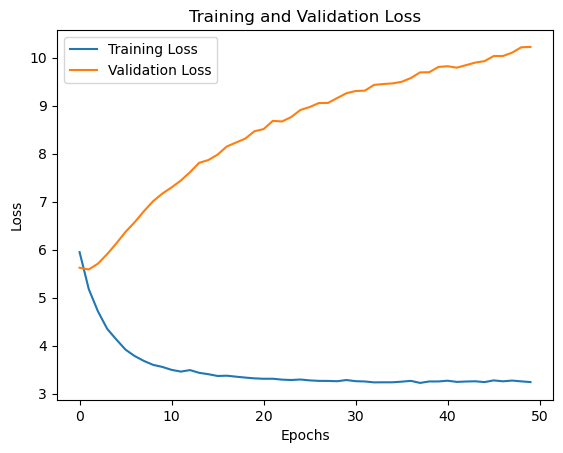

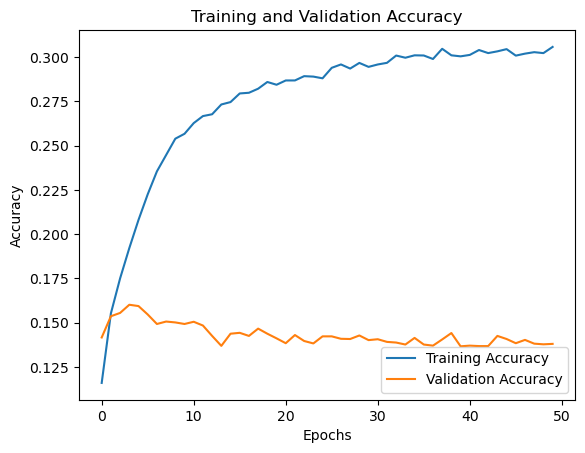

In [17]:
# Plot Loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
history.history['accuracy']

[0.11595809459686279,
 0.1552717387676239,
 0.17503786087036133,
 0.19213414192199707,
 0.20807506144046783,
 0.2225327491760254,
 0.2354915738105774,
 0.24471889436244965,
 0.25396180152893066,
 0.2567253112792969,
 0.26276758313179016,
 0.2667332887649536,
 0.26776373386383057,
 0.273290753364563,
 0.27464908361434937,
 0.2795203626155853,
 0.279910683631897,
 0.28220582008361816,
 0.28599977493286133,
 0.28443849086761475,
 0.2868584990501404,
 0.28687411546707153,
 0.28929412364959717,
 0.2890443205833435,
 0.2880763113498688,
 0.294009268283844,
 0.29591405391693115,
 0.29358771443367004,
 0.2967727780342102,
 0.2945401072502136,
 0.2958984673023224,
 0.29681962728500366,
 0.30094146728515625,
 0.2997080385684967,
 0.3010663688182831,
 0.30097270011901855,
 0.29898983240127563,
 0.30475103855133057,
 0.3010663688182831,
 0.30048868060112,
 0.3013005554676056,
 0.3040640652179718,
 0.30233103036880493,
 0.3033146560192108,
 0.3045637011528015,
 0.3008946180343628,
 0.30201876163482

In [19]:
# Function to predict top five words
def predict_top_five_words(model, tokenizer, seed_text):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    top_five_indexes = np.argsort(predicted[0])[::-1][:5]
    top_five_words = []
    for index in top_five_indexes:
        for word, idx in tokenizer.word_index.items():
            if idx == index:
                top_five_words.append(word)
                break
    return top_five_words

In [20]:
tokenizer.word_index.items()

dict_items([('<oov>', 1), ('the', 2), ('to', 3), ('and', 4), ('of', 5), ('a', 6), ('was', 7), ('he', 8), ('it', 9), ('in', 10), ('i', 11), ('tom', 12), ('you', 13), ('that', 14), ('his', 15), ('mr', 16), ('for', 17), ('on', 18), ('as', 19), ('but', 20), ('had', 21), ('they', 22), ('with', 23), ('be', 24), ('we', 25), ('were', 26), ('at', 27), ('not', 28), ('have', 29), ('there', 30), ('from', 31), ('is', 32), ('this', 33), ('one', 34), ('if', 35), ('all', 36), ('swift', 37), ('by', 38), ('him', 39), ('out', 40), ('well', 41), ('no', 42), ('up', 43), ('some', 44), ('what', 45), ('an', 46), ('my', 47), ('or', 48), ('do', 49), ('get', 50), ('so', 51), ('will', 52), ('them', 53), ('could', 54), ('submarine', 55), ('car', 56), ('then', 57), ('would', 58), ('damon', 59), ('more', 60), ('when', 61), ('captain', 62), ('did', 63), ('sharp', 64), ('about', 65), ('now', 66), ('are', 67), ('me', 68), ('which', 69), ('dont', 70), ('been', 71), ('inventor', 72), ('see', 73), ('go', 74), ('going', 75

In [21]:
import tkinter as tk
from tkinter import ttk
from IPython.display import HTML

def predict_and_display_top_five_words(seed_text, model, tokenizer):
    top_five_words = predict_top_five_words(model, tokenizer, seed_text)
    heading_app = "Sentence AutoCompletion App With Five Outputs"
    output_text = "\n".join([f"{seed_text} {word}" for word in top_five_words])

    # Create the main window
    root = tk.Tk()
    root.title("Top Five Words")
    
    # Create a frame for the heading
    heading_frame = ttk.Frame(root, padding="10")
    heading_frame.grid(row=0, column=0, sticky=(tk.W, tk.E))
    heading_label = ttk.Label(heading_frame, text=heading_app, font=("Helvetica", 16, "bold"))
    heading_label.grid(row=0, column=0, sticky=(tk.W, tk.E))

    # Create a frame for the output text
    output_frame = ttk.Frame(root, padding="10")
    output_frame.grid(row=1, column=0, sticky=(tk.W, tk.E))
    output_label = tk.Text(output_frame, wrap="word", width=50, height=10, font=("Helvetica", 12))
    output_label.grid(row=0, column=0, sticky=(tk.W, tk.E))
    output_label.insert(tk.END, output_text)
    output_label.config(state=tk.DISABLED)

    # Configure column and row weights
    root.columnconfigure(0, weight=1)
    root.rowconfigure(1, weight=1)

    # Start the Tkinter main loop
    root.mainloop()


In [ ]:
# Test the function
seed_text = "Hi how is your"
predict_and_display_top_five_words(seed_text, model, tokenizer)

In [ ]:
# Test the function
seed_text = "I have"
predict_and_display_top_five_words(seed_text, model, tokenizer)

In [ ]:
# Test the function
seed_text = "We love"
predict_and_display_top_five_words(seed_text, model, tokenizer)

In [ ]:
# Import necessary functions
from nltk.metrics import edit_distance

def compute_wer(predictions, references):
    total_distance = 0
    total_words = 0
    for pred, ref in zip(predictions, references):
        if not ref:  # Check if reference sentence is empty
            continue  # Skip empty references
        distance = edit_distance(pred.split(), ref.split())
        total_distance += distance
        total_words += len(ref.split())
    wer = total_distance / total_words if total_words > 0 else 0
    return wer

def f1_score(predictions, references):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for pred, ref in zip(predictions, references):
        if not ref:  # Check if reference sentence is empty
            continue  # Skip empty references
        pred_tokens = set(pred.split())
        ref_tokens = set(ref.split())
        true_positives += len(pred_tokens.intersection(ref_tokens))
        false_positives += len(pred_tokens - ref_tokens)
        false_negatives += len(ref_tokens - pred_tokens)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1, precision, recall

# Generate predictions for the test set
predictions = model.predict(X_test)

# Ensure tokenizer.index_word is properly initialized and indexed from 1 onwards
if 0 not in tokenizer.index_word:
    tokenizer.index_word[0] = ''  # Ensure 0 is handled correctly

# Convert predictions to words
predicted_words = []
for sentence in predictions:
    words = []
    for word in sentence:
        word_index = np.argmax(word)
        if word_index != 0:
            words.append(tokenizer.index_word[word_index])
    predicted_words.append(words)

# Form sentences from predicted words
predicted_sentences = [' '.join(words) for words in predicted_words]

# Convert y_test to reference sentences
reference_sentences = []
for sentence in X_test:
    words = [tokenizer.index_word[word] for word in sentence if word != 0]
    reference_sentences.append(' '.join(words))

# Compute WER, F1 score, Precision, and Recall
wer = compute_wer(predicted_sentences, reference_sentences)
f1, precision, recall = f1_score(predicted_sentences, reference_sentences)

print("Word Error Rate:", wer)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Precision Score:", precision)